# Data Analyst Practical Exam Submission

# Introduction
Pens and Printers, a provider of high quality office supplies to large organizatoins since 1984, launched a new product line of office stationery 6 weeks ago. To optimize sales, they experimented with three strategies: emails, phone calls, and a combination of both.

> #### Email Strategy
- Customers received two emails: one at the product launch and another three weeks later, requiring minimal team effort.
 
> #### Phone Call Strategy
- Sales team members personally called customers, with each call averaging thirty minutes.
 
> #### Combined Strategy
- Customers received an initial email followed by a phone call a week later. The emails were easily crafted by the team, and the calls averaged ten minutes per customer.

## Our Objectives
1. Describe the validation and cleaning process for every column in the data set.
2. Explain the exploratory analysis to answer the following customer questions:
    - How many customers were there for each approach?
    - What does the spread of the revenue look like overall? And for each method?
    - Was there any difference in revenue over time for each of the methods?
    - Based on the data, which method would you recommend?
3. Define metrics for the sales team to monitor
4. Summarize the insights and recommendations for the sales team.

# Data Wrangling

In [3]:
## import all packages and set plots to be embedded incline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm

%matplotlib inline

In [21]:
## Loading data into pandas dataframe
df = pd.read_csv('~/.jupyter/lab/workspaces/data_analysis/datacamp/Certification - Data Analyst - Pens and Printers - DA201/data/product_sales.csv')

# Define palette colors
palette_colors = {'Email + Call': '#ff7f0e', 'Call': '#1f77b4', 'Email': '#2ca02c'}

In [5]:
## Checking the structure of the data

# Check the shape of the data
df.shape

(15000, 8)

In [6]:
# Checking the datatypes and any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


## Data Validation and Data Wrangling
The dataset contains **15,000 rows and 8 columns** before cleaning and validation. I have validation all the columns against the criteria in the data set table:
- **week:** 6 weeks of sales made, counted as weeks since the product launch without missing values, same as description. No data cleaning needed.
- **sales_method:** Described as having character values showing three sales methods used for each customer, there were no missing values. However, there were inconsistent categorical data in this column. To handle this inconsist data, standardize text to sentence case, replace 'em + call' with 'Email + Call'. Final column now only contains "Email", "Call", and "Email + Call".
- **customer_id:** 15,000 unique character values without missing values containing unique customer idenfier, no missing values. Same as description. No data cleaning.
- **nb_sold:** 15,000 numeric values showing number of new products sold without any missing values, same as description. No data cleaning needed.
- **revenue:** This is described as having the numeric values representing revenue from the sales, rounded to 2 decimal places. This column had 1,074 missing values (7.16% of data) which dropping missing values would not obtain a comprehensive analysis. Instead, the missing values have been imputed with median revenue per each sales method. Using median over mean as revenue distribution is right-skewed. (Refer to the plot in the "Spread of Total Revenue" section below)
- **years_as_customer:** Described as having numerical number of years as a customer without any missing values. Contains 15,000 numeric values. There are 2 incorrect values (63, 47) replace by 40, which is the maximum of years since company was founded in 1984.
- **nb_site_visits:** 15,000 numeric values without missing values representing the number of times the customer visited the website in the last 6 months, same as description. No cleaning needed.
- **state:** 50 possible character values without missing values containing 50 states where the orders are shipped, same as description. No cleaning needed.

After Validation: **15,000 rows, 8 columns**, no missing values.


### Fix the typos and mixed variable cases in sales_method column

In [7]:
# Check for all typos in the sales_method column
df['sales_method'].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [8]:
# Resolve typos found in the sales_method column
df.loc[df['sales_method'] == 'em + call', 'sales_method'] = 'email + call'

# Check again that all typos have been resolved
df['sales_method'].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
email + call      23
email             10
Name: count, dtype: int64

In [9]:
# Update the sales_method column to have unform case
df.loc[df['sales_method'] == 'email', 'sales_method'] = 'Email'
df.loc[df['sales_method'] == 'email + call', 'sales_method'] = 'Email + Call'
df.loc[df['sales_method'] == 'call', 'sales_method'] = 'Call'



# Confirm that lower-case has been applied
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


### Impute missing values in revenue column

In [10]:
# Impute missing values in 'revenue' column with the median of the column

df['revenue'] = df.groupby('sales_method')['revenue'].transform(lambda x: x.fillna(x.mean()))

In [11]:
# Checking the median of revenue
df['revenue'].median()

np.float64(90.95)

In [12]:
# Replace null values with the median revenue
df['revenue'].fillna(89.5, inplace=True)

# Confirm that null values have been filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


/tmp/ipykernel_10386/3617957894.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['revenue'].fillna(89.5, inplace=True)


In [13]:
years_filt = df[(df['years_as_customer'] < 0) | (df['years_as_customer'] > 40)]
df.loc[years_filt.index, 'years_as_customer'] = 40

In [14]:
df.shape

(15000, 8)

## How many customers were there for each approach?
The graph shows the number of customers for three sales methods, Call, Email, and Email + Call.
- Email brought in the most customers with over 7000, while calls brought in about 5000 customers.
- The combination of email and calls brought in the fewest customers, with around 3000.

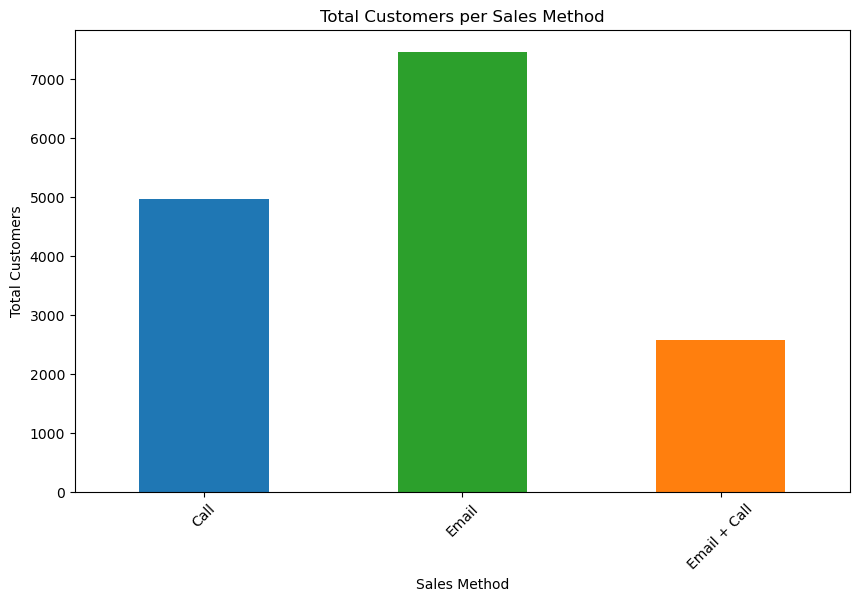

In [15]:
# Define the palette colors for each category
palette_colors = {'Email + Call': '#ff7f0e', 'Call': '#1f77b4', 'Email': '#2ca02c'}

# Group by sales method and count unique customer IDs
customers_per_method = df.groupby("sales_method")["customer_id"].nunique()

# Plotting
plt.figure(figsize=(10, 6))
customers_per_method.plot(kind='bar', color=[palette_colors[method] for method in customers_per_method.index])
plt.title('Total Customers per Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.show()


## What does the spread of revenue look like overall?
The boxplot chart shows that most of the revenue amounts are around \$100, but a little less.
- Most of the revenue amounts fall between \$50 and \$100. 
- There are some revenue amounts that are much higher, over \$190, which are considered unusual or outliers.


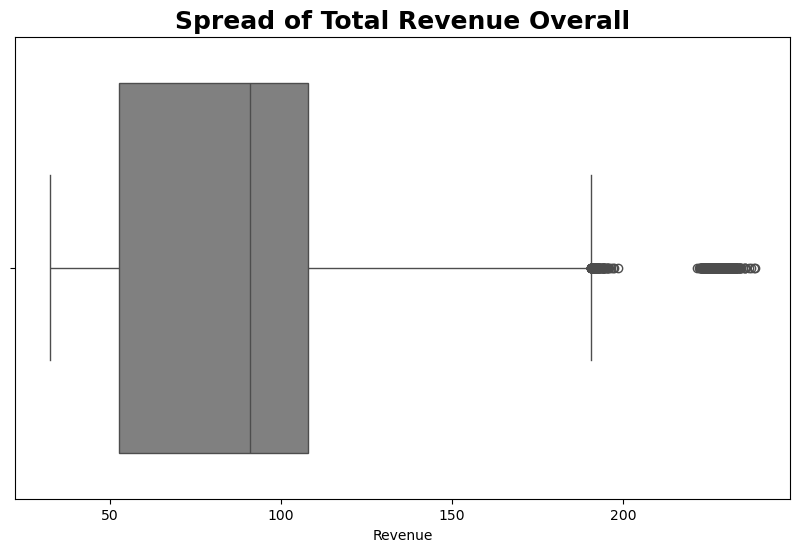

In [16]:
# Spread of Total Revenue Overall
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["revenue"], color="gray").set_title('Spread of Total Revenue Overall', fontdict={'size': 18, 'weight': 'bold'})
plt.xlabel('Revenue')
plt.show()

## Any correlation between the number of new products sold and total revenue per sales method?
The scatter plot shows individual data points for each sale, with different colors representing different sales methods: green for Email, orange for Email + Call, and blue for Call.

The lines are the trend lines for each sales method, indicating the total revenue as the number of new products sold increases.
- The orange line (Email + Call) has the steepest slope, indicating that it generates the highest total revenue per new products sold.
- The green line (Email) has a moderately steep slope, suggesting it yields higher revenue than the blue line (Call) but lower than the orange line (Email + Call).
- The blue line (Call) has the shallowest slope, implying it generates the lowest total revenue per new products sold among the three methods.


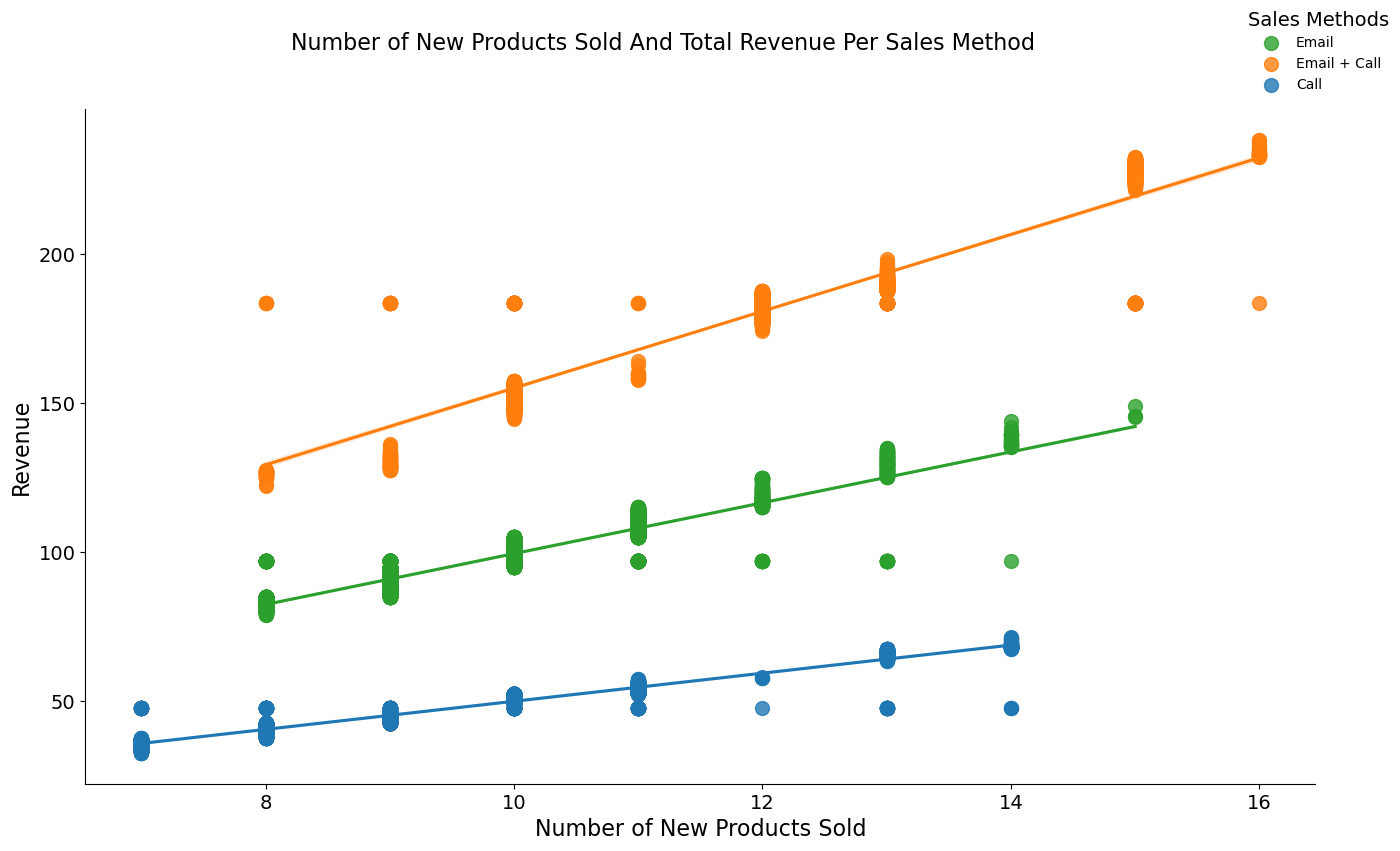

In [17]:
# Create a scatter plot

lm = sns.lmplot(
    data=df, 
    x='nb_sold', 
    y='revenue', 
    hue='sales_method', 
    palette=palette_colors, 
    aspect=1.5, 
    height=8, 
    markers='o', 
    scatter_kws={'s': 100}
)

# Customize the plot
lm.set_axis_labels('Number of New Products Sold', 'Revenue', fontsize=16)
lm.fig.suptitle('Number of New Products Sold And Total Revenue Per Sales Method', y=1.03, fontsize=16)

# Increase tick sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust legend title
legend = lm._legend
legend.set_title('Sales Methods', prop={'size': 14})

# Adjust legend position if needed
lm._legend.set_bbox_to_anchor((1.05, 1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## How many years as a customer and total revenue by sales method over 6 weeks?

**Years As Customers:** The left chart shows the distribution of customers based on their years of association with the company.
- Most customers have been with the company for less than 5 years, indicating a relatively young customer base. Further investigation into strategies to improve customer retention and loyalty could prove useful.

**Total Revenue Over Time by Sales Method:** The right chart shows the total revenue over time (6 weeks) for each sales method.
- The Email + Call method started with the lowest revenue generated, however, there is a clear upward trend over the weeks, surpassing the other two methods in the last two weeks.
- The Email began with the highest revenue generated, however has declined over time.
- The Call method generates the least revenue and shows a relatively flat trend.


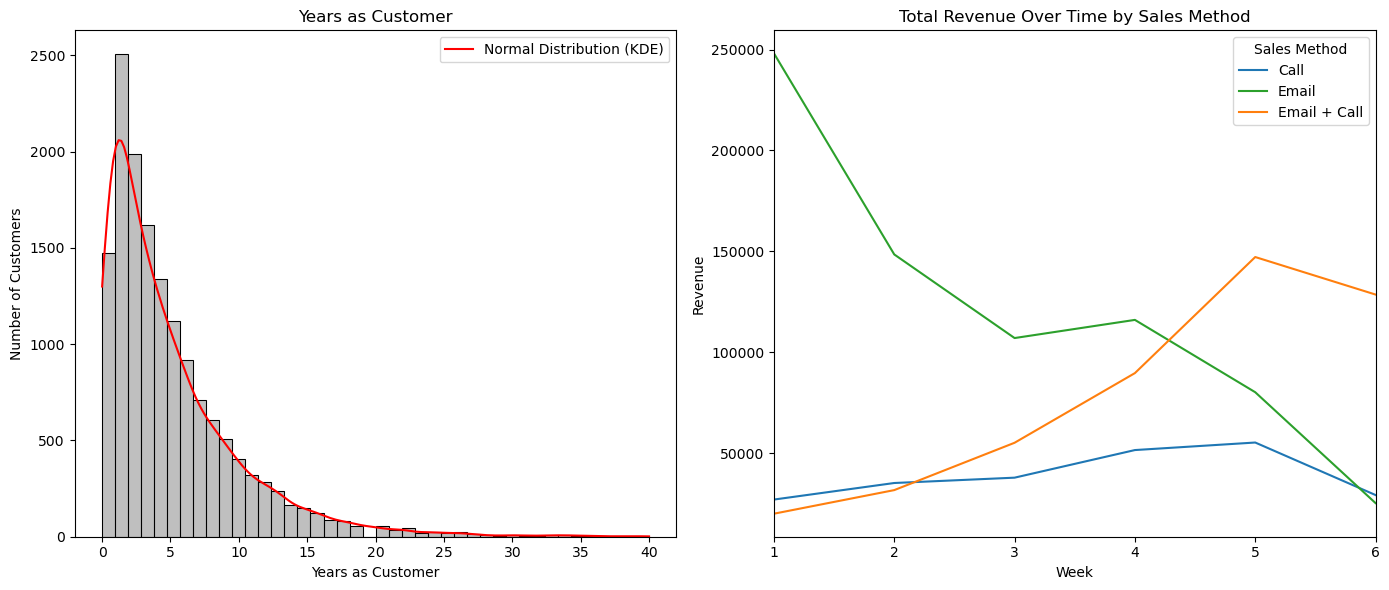

In [18]:
# Create a figure with two subplots side-by-side
plt.figure(figsize=(14, 6))

# Plot customer tenure
plt.subplot(1, 2, 1)
ax = sns.histplot(df['years_as_customer'], bins=42, kde=True, color='gray')
plt.title('Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Number of Customers')

# Get the KDE line set to red
kde_line = ax.lines[0]
kde_line.set_color('red')

# Set the label and create the legend
kde_line.set_label('Normal Distribution (KDE)')
ax.legend()



# Aggregate data by week
weekly_data = df.groupby(['week', 'sales_method']).agg({
    'revenue': 'sum',
    'nb_sold': 'sum'
}).reset_index()

# Calculate weekly metrics
weekly_data['average_revenue_per_sale'] = weekly_data['revenue'] / weekly_data['nb_sold']

# Plot total revenue over time
plt.subplot(1, 2, 2)
sns.lineplot(data=weekly_data, x='week', y='revenue', hue='sales_method', palette=palette_colors)
plt.title('Total Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xlim(1, weekly_data['week'].max())  # Set x-axis to start from 1
plt.legend(title='Sales Method')
plt.tight_layout()
plt.show()

### What is the average revenue over 6 weeks by sales method?
The line plot displays the average revenue per week for each sales method.
- The Email + Call method leads in average revenue per week, showing a steady increase.
- The Email method is in the middle, with a moderate but consistent increase in average revenue.
- The Call method remains the least effective, with the lowest average revenue and a slower growth rate.

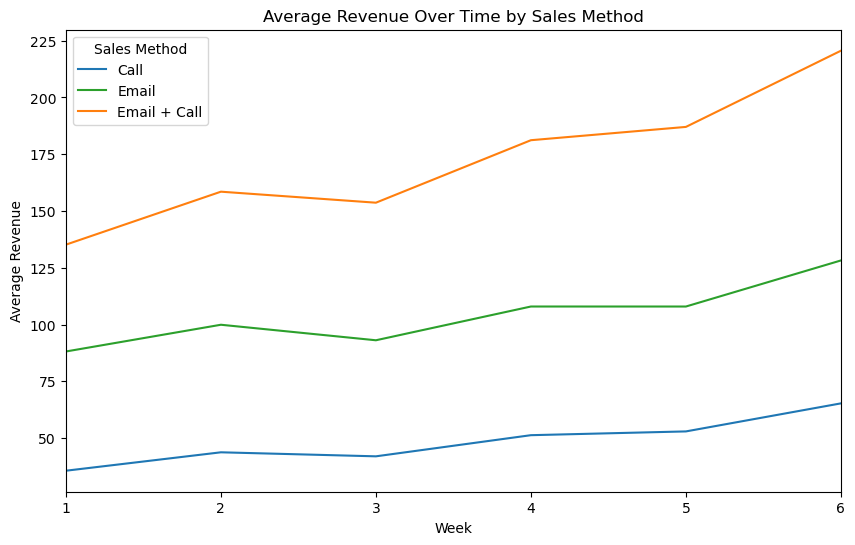

In [19]:
# Aggregate data by week and sales method to calculate average revenue
weekly_avg_revenue = df.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

# Plot average revenue over time by sales method
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_avg_revenue, x='week', y='revenue', hue='sales_method', palette=palette_colors)
plt.title('Average Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.legend(title='Sales Method')
plt.xlim(1, weekly_avg_revenue['week'].max())  # Set x-axis to start from 1
plt.show()

## Bringing It All Together: A Comprehensive Analysis

**Emails Attract the Most Customers:** Emails brought in the largest number of customers, with over 7,000, while calls brought in about 5,000 customers. The combination of email and calls had the fewest customers, with around 3,000.

**Revenue Insights:** The average revenue per transaction falls between \$50 and \$100, with some higher outliers reaching over \$190. Interestingly, there's a positive correlation between the number of new products sold and the total revenue for each sales method. Email + call method generated the highest revenue per new product sold, followed by emails, and then calls.

**Customer Loyalty:** Most customers have been with the company for less than 5 years, indicating room for improving customer retention and loyalty.

**Trends Over Time:** While emails initially generated the highest revenue, it has decreased significantly over time. In contrast, the email + call method has shown tremendous growth, eventually surpassing the other two methods. Over the past 6 weeks, the email + call method has consistently led in average revenue per week, showing a steady increase. Email follows with a similar trend, while calls have mostly remained flat.

## What metrics should the business monitor?

Our goal is to find the best method to coninue to use. Launching new products is costly, so quickly identifying what works and what doesn't is crucial. Additionally, it's essential to recognize that the best methods can change over time. Having clear business metrics to track can help make necessary adjustments.

Utilizing metrics like Average Order Revenue (AOR), Average Order Size (AOS), Total Revenue, and Total New Products Sold segmented for each sales method over time can provide clear direction on the best sales methods to use. These insights can inform strategic decisions and drive business growth.

### Average Order Revenue (AOR):
AOR shows how much money is made on average from each order. It helps understand the revenue generated per sale.

$$\text{AOR}={\text{Total Revenue}\over \text{Total Orders}}$$

**AOR For Each Sales Method:**
- Call: \$49.13
- Email: \$96.57
- Email + Call: \$170.88


Insight: The combination of email + call generates the highest average order revenue, significantly higher than using either method alone.

### Average Order Size (AOS):
AOS shows the average number of items in each order. It helps understand how many products customers are buying per order.

$$\text{AOS}={\text{Total Products Sold}\over \text{Total Orders}}$$

**AOS For Each Sales Method:**
- Call: 9.51
- Email: 9.73
- Email + Call: 12.23


Insight: The combination of email + call also results in the highest average order size, indicating more products are sold per order when both methods are used.

### Total Revenue:
Total revenue shows the total amount of money made from all sales. It helps measure the overall sales performance.

$$\sum (\text{Total Revenue})$$

**Total Revenue For Each Sales Method:**
- Call: \$243,762.99
- Email: \$721,005.83
- Email + Call: \$439,492.19


Insight: Email alone generates the highest total revenue, followed by the combination of email + call, and then call alone. However, keep in mind the combination of email + call is trending higher during the last two weeks.

### Total Products Sold:
Total products sold shows the total number of products sold. It helps understand the sales volume.

$$\sum (\text{Sum of all products sold})$$

**Total Products Sold For Each Sales Method:**
- Call: 47,187
- Email: 72,639
- Email + Call: 31,444


Insight: Email alone results in the highest number of products sold, followed by call alone, and then the combination of email + call.

In [20]:
# Data
sales_data = {
    'Sales Method': ['Call', 'Email', 'Email + Call'],
    '(AOR)': ['$49.13', '$96.57', '$170.88'],
    '(AOS)': ['9.51', '9.73', '12.23'],
    'Total Revenue': ['$243,762.99', '$721,005.83', '$439,492.19'],
    'Total Products Sold': ['47,187', '72,639', '31,444']
}

# Create DataFrame
sales_df = pd.DataFrame(sales_data)
sales_df



,Sales Method,(AOR),(AOS),Total Revenue,Total Products Sold
0,Call,$49.13,9.51,"$243,762.99","47,187"
1,Email,$96.57,9.73,"$721,005.83","72,639"
2,Email + Call,$170.88,12.23,"$439,492.19","31,444"


## Business Recommendation:
1. Based on final analysis, utilize the Email + Call method for the primary method as it showed a positive trend and significant growth in total revenue and average order revenue (AOR).
2. Use the Email strategy as a supplementary method for customers who might not respond well to calls, ensuring broader reach and engagement and requires little effort.
3. Stop using the call approach because it has been underperforming in total revenue and AOR, and it also required more work from the sales team compared to the other methods.

## Monitoring Plan:

### Revenue Tracking:
- **Sales Monitoring:** Continue tracking the AOR and AOS for each sales methods, as well as tracking total products sold and total revenue.
- **Trend Analysis:** Continue to analyze the revenue trends.
- **Make Adjustments** Continue to identify any shifts in effectiveness and adjust the strategy accordingly.

### Customer Segmentation:
- Segment customers based on their years of association and tailor the sales approach to different segments. For example, newer customers might receive more engaging content, while long-term customers could be approached with loyalty incentives.

### Sales Team Performance:
- Monitor the performance of the sales team in terms of call duration and conversion rates for the combined method.
- Provide training and resources to optimize the effectiveness of the Email + Call strategy.

## For Future In-Depth Analysis:
- Investigate the 1,074 missing values in the revenue column. Understanding the reasons behind these missing values can provide insights for future analysis and help us enhance our data collection methods.
- Gather data on the average time spent per sales method per customer. This will help us see how revenue is affected by the time spent by both our team and customers.
- Collect feedback from customers engaged through each method to understand their preferences and satisfaction.
- Use surveys or direct feedback channels to gather insights on the customer experience with each sales approach.